In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from math import sqrt
import numpy as np

In [72]:
# get pandas data frame
df = pd.read_csv('simulation_data.csv', na_values=['NA', 'N/A', 'None'])
# Display basic statistics about the dataset
print("Dataset statistics:")
print("===================")
df.describe()

Dataset statistics:


,timestamp,x,y,oxygen_sat,heart_rate,temperature,air_quality
count,18488.000000,18488.000000,18488.000000,18488.000000,18488.000000,18409.000000,18379.000000
mean,1417.669554,-59.593819,42.155255,0.975036,95.430550,91.891824,30.189089
std,532.849216,231.907542,231.513880,0.008715,59.218725,0.377216,0.037675
min,58.190000,-399.622900,-483.428700,0.960000,30.000000,91.271470,30.127150
25%,1019.700000,-264.998300,-120.545825,0.960000,60.000000,91.573740,30.157300
50%,1444.190000,-140.604950,72.628360,0.980000,60.000000,91.874790,30.187410
75%,1866.240000,104.961150,228.665300,0.980000,160.000000,92.176360,30.217490
max,2287.980000,463.636800,484.080000,0.990000,200.000000,92.830310,30.282960


In [18]:
# show field names
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18488 entries, 0 to 18487
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   animal_id    18488 non-null  object 
 1   animal       18488 non-null  object 
 2   timestamp    18488 non-null  float64
 3   x            18488 non-null  float64
 4   y            18488 non-null  float64
 5   oxygen_sat   18488 non-null  float64
 6   heart_rate   18488 non-null  int64  
 7   temperature  18409 non-null  float64
 8   air_quality  18379 non-null  float64
dtypes: float64(6), int64(1), object(2)
memory usage: 1.3+ MB


In [73]:
record_counts = df.groupby(['animal_id', 'animal']).size().reset_index(name='count')

record_counts['animal'].value_counts()

Zebra       7
Elephant    2
Lion        2
Name: animal, dtype: int64

In [75]:
zebras = df[df["animal"] == "Zebra"]
z_grouped = zebras.groupby('animal_id')
all_grouped = df.groupby('animal_id')

for name, group in z_grouped:
    print(name)

1a1151
96afe5
aa7514
c38792
c5ea78
dab349
e63ca2


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


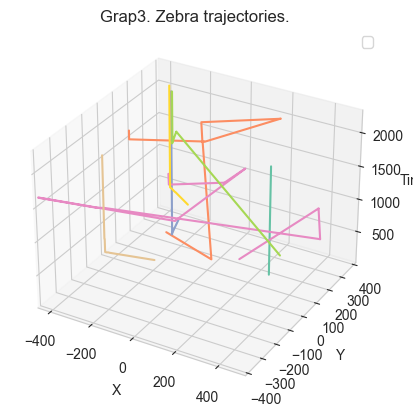

<Figure size 800x600 with 0 Axes>

In [39]:

zebra_1 = df[df["animal_id"] == "96afe5"]

# Generate some sample data
#x = zebra_1["lat"]
#y1 = zebra_1["lon"]
#y2 = np.cos(x)
#y3 = np.tan(x)
#z = zebra_1["timestamp"]

# Create the figure and axis objects
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the data as a 3D line graph
for name, group in z_grouped:
    ax.plot(group["x"], group["y"], group["timestamp"])
#ax.plot(x, y2, z, label='Line 2')
#ax.plot(x, y3, z, label='Line 3')

# Add labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Time')
ax.set_title('Grap3. Zebra trajectories.')

ax.set_ylim([-400, 400])

# Add legend
ax.legend()

# Show the plot
plt.figure(figsize=(8, 6))
plt.show()


0    30
1    50
2    70
3    90
dtype: int64


In [83]:

def euclidean_dist(row1, row2):
    dist = sqrt((row1['x'] - row2['x'])**2 + (row1['y'] - row2['y'])**2)
    time_ = row2['timestamp'] - row1['timestamp']
    speed = dist / time_
    return dist, speed

distances = {}
speeds = []

for name, group in z_grouped:
    print(name)
    result = [0]
    zg = group.sort_values('timestamp', ascending=True)
    zg = zg.reset_index(drop=True)

    # Iterate through the rows and apply the function to adjacent pairs of rows on column B
    for i in range(len(zg)-1):
        dist, speed = euclidean_dist(zg.iloc[i], zg.iloc[i+1])
        result.append(dist)
        speeds.append(speed)

    #print(sum(result))
    distances[name] = sum(result)

print(distances)
speeds[2]

1a1151
96afe5
aa7514
c38792
c5ea78
dab349
e63ca2
{'1a1151': 0.0, '96afe5': 2277.143795530812, 'aa7514': 130.23842670869072, 'c38792': 3129.1284113142883, 'c5ea78': 971.2030263296821, 'dab349': 114.90088478762078, 'e63ca2': 200.64602276403943}


0.0

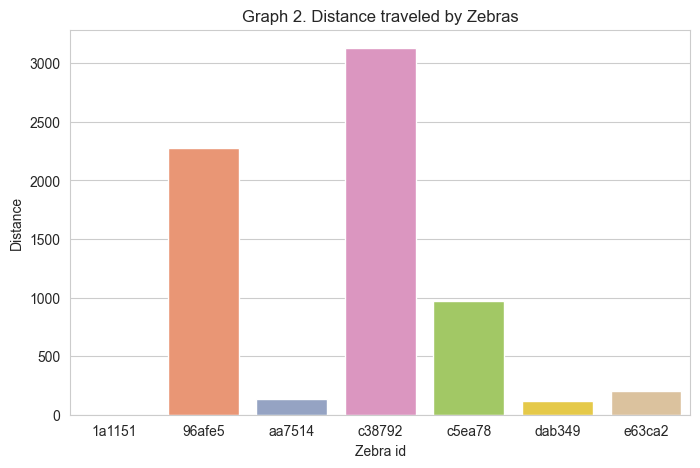

In [33]:
sns.set_style("whitegrid")  # Setting style for Seaborn
sns.set_palette("Set2")  # Setting color palette for Seaborn

plt.figure(figsize=(8, 5))  # Setting figure size for the plot

sns.barplot(x=list(distances.keys()), y=list(distances.values()))

plt.title("Graph 2. Distance traveled by Zebras")
plt.xlabel("Zebra id")
plt.ylabel("Distance")

plt.show()

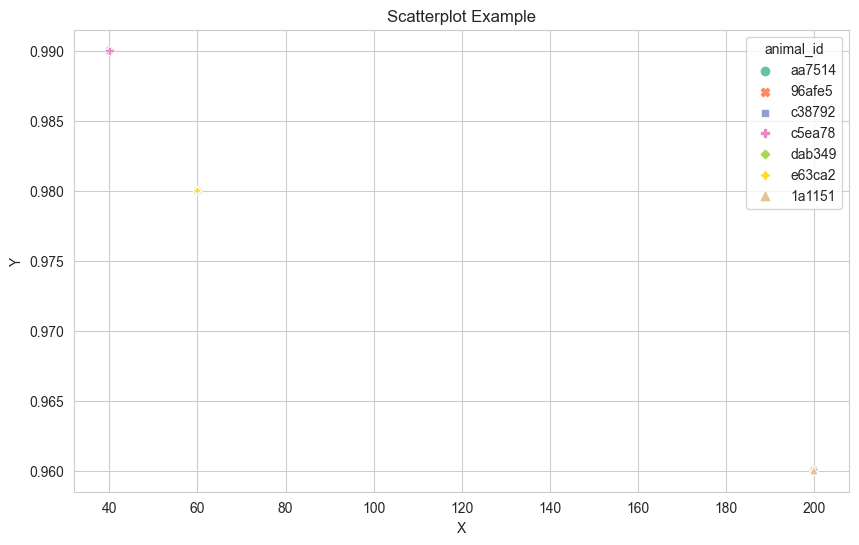

In [29]:

# Set the style and color palette
sns.set_style('whitegrid')
sns.set_palette('Set2')

# Set the figure size and title
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Scatterplot Example')

# Plot the data with markers for each category
sns.scatterplot(x='heart_rate', y='oxygen_sat', data=zebras, hue='animal_id', style='animal_id')

# Set the axis labels
ax.set_xlabel('X')
ax.set_ylabel('Y')

# Show the plot
plt.show()

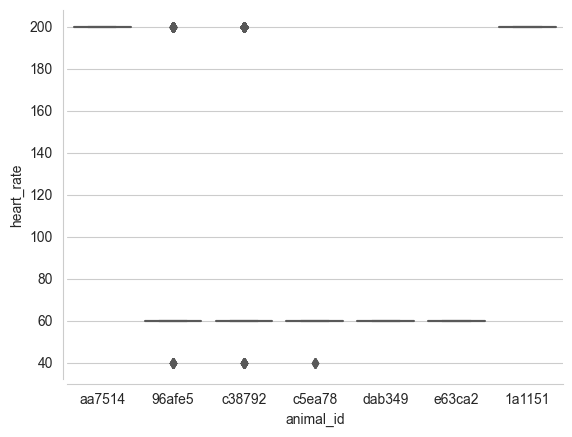

In [11]:
sns.set_style("whitegrid")  # Setting style for Seaborn
sns.set_palette("Set2")  # Setting color palette for Seaborn

sns.boxplot(x="animal_id", y="heart_rate",
            data=zebras)

sns.despine(offset=3, trim=False)

In [22]:
heart_rate_stats = zebras.groupby('animal_id')['heart_rate'].agg(['mean', 'max', 'min', lambda x: x.value_counts().idxmax()])

heart_rate_stats.rename(columns={'<lambda_0>': 'most_repeated'})

,mean,max,min,most_repeated
animal_id,,,,
1a1151,200.000000,200,200,200
96afe5,63.790974,200,40,60
aa7514,200.000000,200,200,200
c38792,75.909320,200,40,60
c5ea78,59.954076,60,40,60
dab349,60.000000,60,60,60
e63ca2,60.000000,60,60,60


In [23]:
heart_rate_stats = zebras.groupby('animal_id')['oxygen_sat'].agg(['mean', 'max', 'min', lambda x: x.value_counts().idxmax()])

heart_rate_stats.rename(columns={'<lambda_0>': 'most_repeated'})

,mean,max,min,most_repeated
animal_id,,,,
1a1151,0.960000,0.96,0.96,0.96
96afe5,0.979506,0.99,0.96,0.98
aa7514,0.960000,0.96,0.96,0.96
c38792,0.977814,0.99,0.96,0.98
c5ea78,0.980023,0.99,0.98,0.98
dab349,0.980000,0.98,0.98,0.98
e63ca2,0.980000,0.98,0.98,0.98


In [24]:
heart_rate_stats = zebras.groupby('animal_id')['temperature'].agg(['mean', 'max', 'min', lambda x: x.value_counts().idxmax()])

heart_rate_stats.rename(columns={'<lambda_0>': 'most_repeated'})

,mean,max,min,most_repeated
animal_id,,,,
1a1151,91.834524,92.39545,91.27147,92.39545
96afe5,92.028336,92.78094,91.27147,92.78094
aa7514,92.053055,92.83031,91.27147,92.83031
c38792,91.983075,92.69125,91.27147,92.69125
c5ea78,91.897712,92.52100,91.27147,92.52100
dab349,91.871518,92.46953,91.27147,92.46953
e63ca2,91.857155,92.44040,91.27147,92.44040


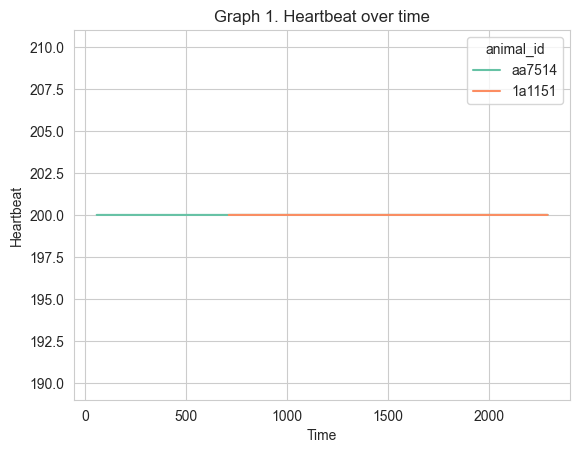

In [66]:
odd_zebras = zebras[zebras['animal_id'].isin(['1a1151','aa7514'])]

sns.lineplot(x='timestamp', y='heart_rate', hue='animal_id', data=odd_zebras)

# Set plot title and axis labels
plt.title("Graph 1. Heartbeat over time")
plt.xlabel("Time")
plt.ylabel("Heartbeat")

plt.show()

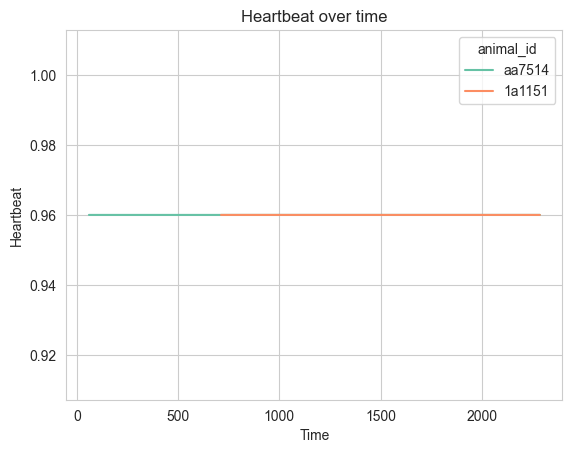

In [32]:

sns.lineplot(x='timestamp', y='oxygen_sat', hue='animal_id', data=odd_zebras)

# Set plot title and axis labels
plt.title("Heartbeat over time")
plt.xlabel("Time")
plt.ylabel("Heartbeat")

plt.show()

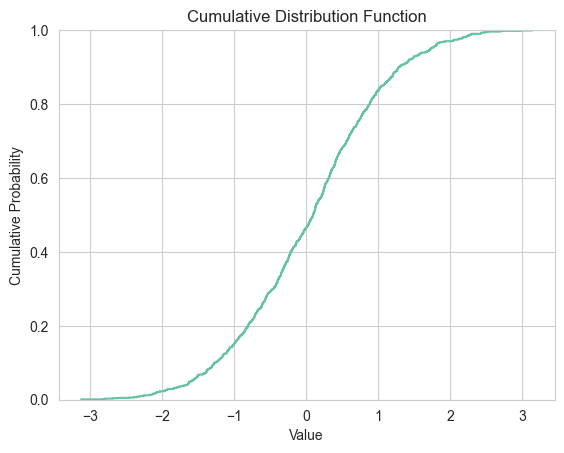

In [40]:
data = np.random.normal(size=1000)

# Create the CDF plot using seaborn
sns.ecdfplot(data)

# Add labels and title
plt.xlabel('Value')
plt.ylabel('Cumulative Probability')
plt.title('Cumulative Distribution Function')

# Show the plot
plt.show()

In [46]:
distances = {}

for name, group in all_grouped:
    animal_key = f'{group.iloc[0]["animal"]}-{name}'
    print(animal_key)
    result = [0]

    # Iterate through the rows and apply the function to adjacent pairs of rows on column B
    for i in range(len(group)-1):
        result.append(euclidean_dist(group.iloc[i], group.iloc[i+1]))

    #print(sum(result))
    distances[animal_key] = sum(result)

print(distances)

Zebra-1a1151
Elephant-70a65a
Zebra-96afe5
Lion-a608df
Zebra-aa7514
Zebra-c38792
Zebra-c5ea78
Zebra-dab349
Elephant-e28cde
Zebra-e63ca2
Lion-f537b0
{'Zebra-1a1151': 0.0, 'Elephant-70a65a': 1339.0544654581781, 'Zebra-96afe5': 2277.143795530812, 'Lion-a608df': 1941.5128057021975, 'Zebra-aa7514': 130.23842670869072, 'Zebra-c38792': 3129.1284113142883, 'Zebra-c5ea78': 971.2030263296821, 'Zebra-dab349': 114.90088478762078, 'Elephant-e28cde': 1291.9234966181868, 'Zebra-e63ca2': 200.64602276403943, 'Lion-f537b0': 2363.8633020545003}


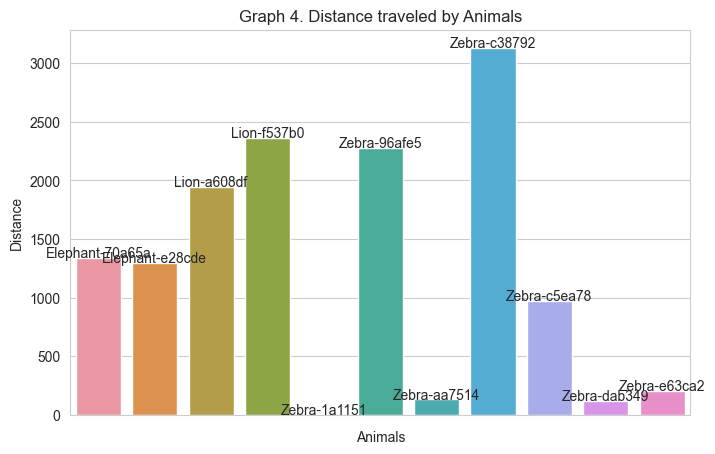

In [65]:
sns.set_style("whitegrid")  # Setting style for Seaborn
sns.set_palette("Set2")  # Setting color palette for Seaborn

plt.figure(figsize=(8, 5))  # Setting figure size for the plot

data = {'id': list(distances.keys()), 'value': list(distances.values())}
df_data = pd.DataFrame(data).sort_values('id').reset_index(drop=True)
ax = sns.barplot(x='id', y='value', data=df_data)
ax.set(xticklabels=[])

# Add labels to each bar
for index, row in df_data.iterrows():
    ax.text(index, row['value'] + 5, row['id'], ha='center')

plt.title("Graph 4. Distance traveled by Animals")
plt.xlabel("Animals")
plt.ylabel("Distance")

plt.show()

In [63]:
df_data

,id,value
1,Elephant-70a65a,1339.054465
8,Elephant-e28cde,1291.923497
3,Lion-a608df,1941.512806
10,Lion-f537b0,2363.863302
0,Zebra-1a1151,0.000000
2,Zebra-96afe5,2277.143796
4,Zebra-aa7514,130.238427
5,Zebra-c38792,3129.128411
6,Zebra-c5ea78,971.203026
7,Zebra-dab349,114.900885


In [92]:
temp_rate_stats = zebras.groupby('animal_id')['temperature'].agg(['mean', 'max', 'min'])

temp_rate_stats

,mean,max,min
animal_id,,,
1a1151,91.834524,92.39545,91.27147
96afe5,92.028336,92.78094,91.27147
aa7514,92.053055,92.83031,91.27147
c38792,91.983075,92.69125,91.27147
c5ea78,91.897712,92.52100,91.27147
dab349,91.871518,92.46953,91.27147
e63ca2,91.857155,92.44040,91.27147


In [93]:
air_rate_stats = zebras.groupby('animal_id')['air_quality'].agg(['mean', 'max', 'min'])

air_rate_stats

,mean,max,min
animal_id,,,
1a1151,30.183345,30.23933,30.12715
96afe5,30.202726,30.27788,30.12715
aa7514,30.205270,30.28296,30.12715
c38792,30.198200,30.26891,30.12715
c5ea78,30.189664,30.25188,30.12715
dab349,30.187044,30.24667,30.12715
e63ca2,30.185608,30.24382,30.12715


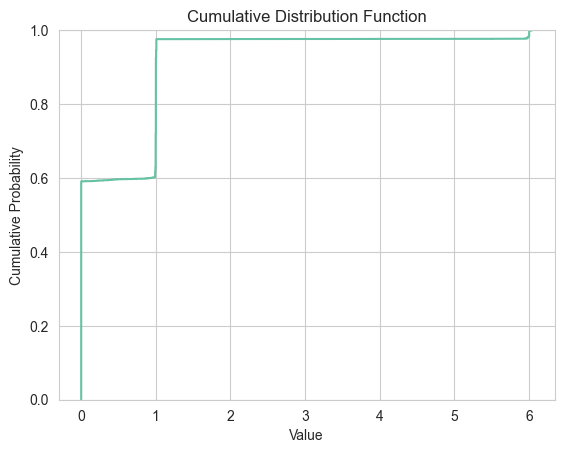

In [87]:
len(speeds)

sns.ecdfplot(speeds)

# Add labels and title
plt.xlabel('Speed')
plt.ylabel('Cumulative Probability')
plt.title('Cumulative Distribution Function')

# Show the plot
plt.show()

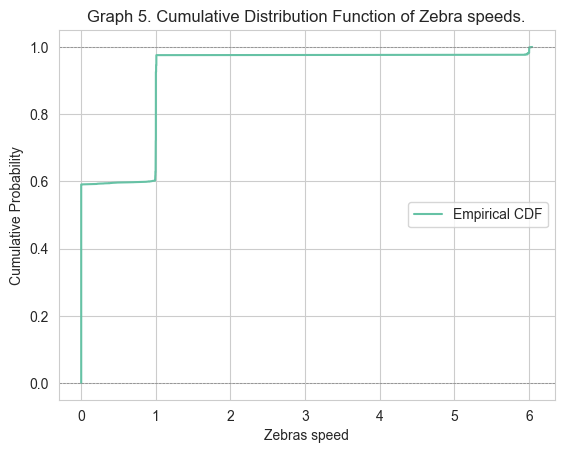

In [91]:
# Sort the data in ascending order
sorted_data = np.sort(speeds)

# Calculate the empirical CDF
n = len(sorted_data)
cdf = np.arange(1, n + 1) / n

# Create the CDF plot using matplotlib
plt.plot(sorted_data, cdf, label='Empirical CDF')

# Add labels and title
plt.xlabel('Zebras speed')
plt.ylabel('Cumulative Probability')
plt.title('Graph 5. Cumulative Distribution Function of Zebra speeds.')

# Add a reference line at y=0 and y=1 for clarity
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
plt.axhline(1, color='gray', linestyle='--', linewidth=0.5)

# Show the legend
plt.legend()

# Show the plot
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


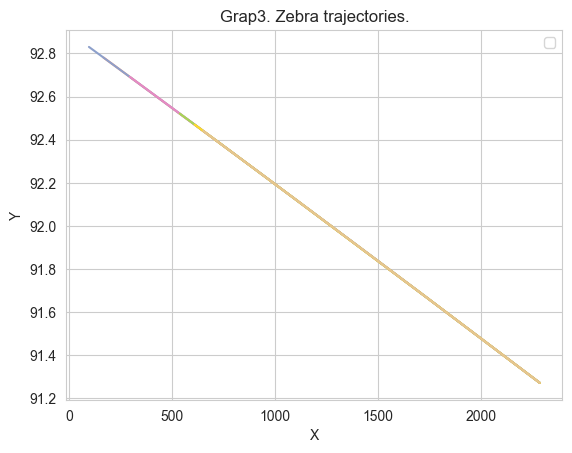

<Figure size 800x600 with 0 Axes>

In [99]:

fig = plt.figure()
ax = fig.add_subplot(111)

# Plot the data as a 3D line graph
for name, group in z_grouped:
    ax.plot(group["timestamp"], group["temperature"])
#ax.plot(x, y2, z, label='Line 2')
#ax.plot(x, y3, z, label='Line 3')

# Add labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Grap3. Zebra trajectories.')

# Add legend
ax.legend()

# Show the plot
plt.figure(figsize=(8, 6))
plt.show()